In [ ]:
##section A MCQ

In [ ]:
1. Plotly Express is used for:
a) Low-level graphs
b) One-line high-level visualizations
c) dashboards only
d) maps only

ans : b) One-line high-level visualizations

In [ ]:
2. px.scatter() is used for:
a) Category comparison
b) Time-series
c) Relationship between two variables
d) Box analysis

ans : c) Relationship between two variables

In [ ]:
3. To create dark mode theme, we use:
a) px.theme_dark
b) template="plotly_dark"
c) color="dark"
d) fig.dark()

ans : b) template="plotly_dark"

In [ ]:
4. px.imshow() is commonly used for:
a) Correlation heatmaps
b) 3D surface
c) Bar charts
d) Regression

ans : a) Correlation heatmaps

In [ ]:
5. Hover information in Plotly is:
a) Static
b) Automatic and interactive
c) Added manually only
d) Not supported

ans : b) Automatic and interactive

In [ ]:
6. A benefit of Plotly over Matplotlib is:
a) Simple syntax
b) Interactivity
c) Better for static plots only
d) Fewer chart types

ans : b) Interactivity

In [ ]:
7. px.histogram() shows:
a) Outliers
b) Distribution
c) Category frequency
d) Maps

ans : b) Distribution

In [ ]:
8. go.Figure() belongs to:
a) plotly.express
b) plotly.graph_objects
c) numpy
d) pandas

ans : b) plotly.graph_objects

In [ ]:
9. px.line() is commonly used for:
a) Trends
b) Proportion
c) Density
d) Hierarchy

ans : a) Trends

In [ ]:
10. px.sunburst() is used for:
a) Distribution
b) Hierarchical visualization
c) Regression
d) Time-series

ans : b) Hierarchical visualization

In [ ]:
11. Animations are supported using:
a) animate=True
b) animation_frame
c) slide=True
d) move=True

ans : b) animation_frame 

In [ ]:
12. px.bar() includes:
a) Interactive hover
b) Static bars
c) Only text labels
d) No customization

ans : a) Interactive hover

In [ ]:
13. Heatmap colors are adjusted using:
a) coloraxis
b) colorscope
c) colormap
d) heatcolor

ans : a) coloraxis

In [ ]:
14. Interactive maps are created using:
a) px.scatter_map
b) px.choropleth
c) px.map
d) px.world()

ans : b) px.choropleth

In [ ]:
15. Plotly is built on:
a) Matplotlib
b) D3.js & WebGL
c) OpenCV
d) Unity Engine

ans : b) D3.js & WebGL

In [ ]:
##Section B Case study 

In [2]:
import pandas as pd
import plotly.express as px

In [4]:
df = pd.read_csv("social_media_engagement1.csv")
df.head()

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive


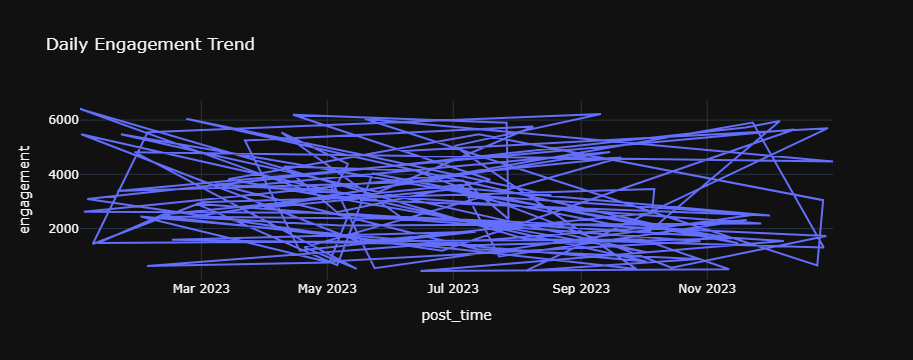

In [10]:
#A brand wants to monitor daily engagement trends.
#Tasks:
# Load dataset
# Create px.line() for Engagement vs Date
# Add hover_data, title, template="plotly_dark"
# Interpret the trend

# Ensure post_time is datetime
df['post_time'] = pd.to_datetime(df['post_time'])

# Calculate engagement
df['engagement'] = df['likes'] + df['comments'] + df['shares']

# Create line plot
fig = px.line(df,x='post_time',y='engagement',hover_data=['post_type', 'platform'],title="Daily Engagement Trend",
    template="plotly_dark")

fig.show()

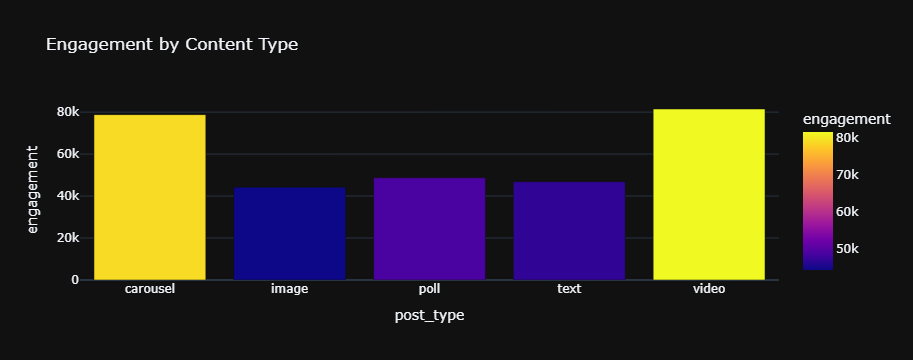

In [8]:
#Management wants an interactive category comparison.
#Tasks:
# Group by Content_Type
# Plot px.bar()
# Add color, title
# Identify highest performing category

df['engagement'] = df['likes'] + df['comments'] + df['shares']

# Group by Content_Type and sum engagement
category_engagement = df.groupby('post_type', as_index=False)['engagement'].sum()

# Create interactive bar plot
fig = px.bar(category_engagement,x='post_type',y='engagement',color='engagement',
    title="Engagement by Content Type",
    template="plotly_dark")

fig.show()

In [11]:
#A research analyst needs to study:
#Content_Length vs Engagement with Shares as bubble size.
#Tasks:
# px.scatter(size="Shares", color="Content_Type")
# Add hover_name="Post_ID"
# Describe result

# Calculate engagement if not already done
df['engagement'] = df['likes'] + df['comments'] + df['shares']

# Create bubble/scatter plot
fig = px.scatter(df,x='Content_Length',y='engagement',
    size='shares',              # bubble size
    color='post_type',          # category color
    hover_name='post_id',       # info on hover
    title="Content Length vs Engagement",
    template="plotly_dark"
)

fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['post_id', 'platform', 'post_type', 'post_time', 'likes', 'comments', 'shares', 'post_day', 'sentiment_score', 'engagement'] but received: Content_Length

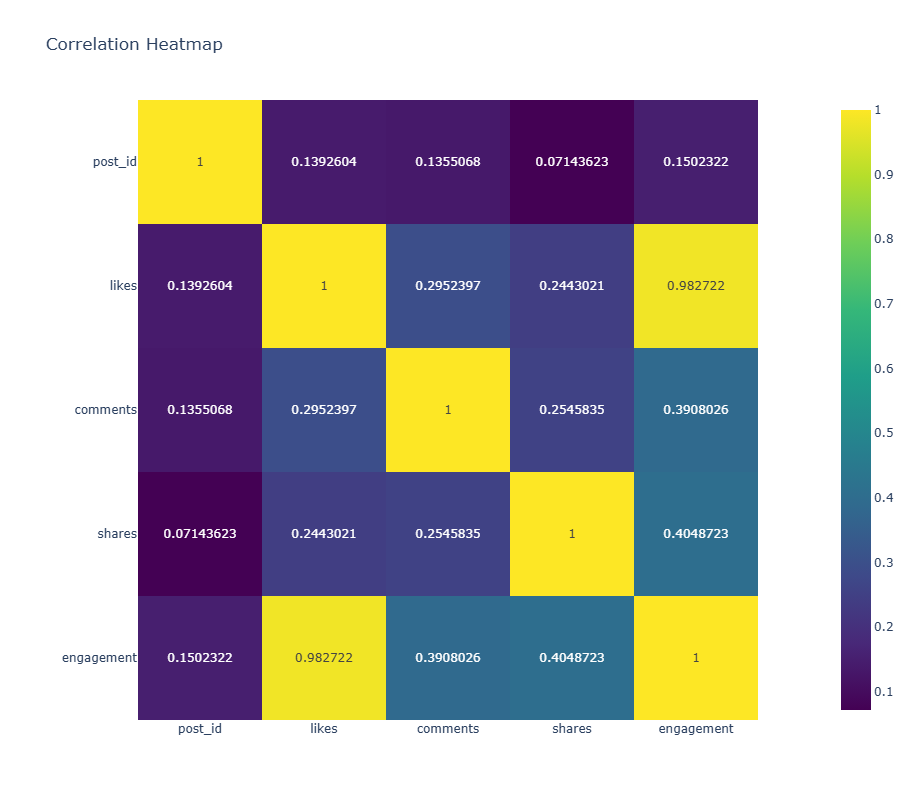

In [18]:
#To find strongest relationships:
# Prepare numeric matrix
# Use px.imshow()
# Add color_continuous_scale
# Identify two strong correlations

# Select numeric columns for correlation

cor = df.corr(numeric_only=True)

# Plot correlation heatmap
fig = px.imshow(cor,text_auto=True,color_continuous_scale='Viridis',  # or "Plasma", "Cividis"
    title="Correlation Heatmap",width=900,height=800)
fig.show()

In [19]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

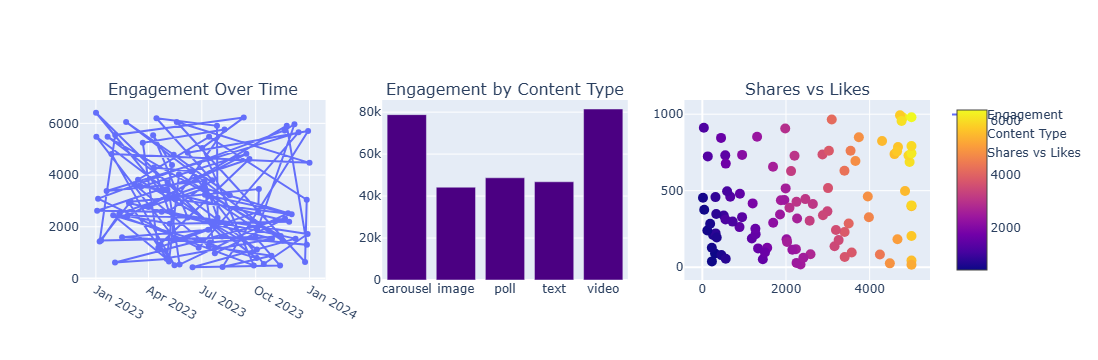

In [23]:
#Create a dashboard with 3 charts side-by-side using go.Figure() + subplots:
#1. Line chart → Engagement
#2. Bar chart → Content Type
#3. Scatter → Shares vs Likes
#Add titles and interactivity.

# Calculate engagement
df['engagement'] = df['likes'] + df['comments'] + df['shares']

# Aggregate data for bar chart
category_engagement = df.groupby('post_type', as_index=False)['engagement'].sum()

# Create subplot figure with 1 row, 3 columns
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=("Engagement Over Time", "Engagement by Content Type", "Shares vs Likes")
)

# 1. Line chart → Engagement over time
line_trace = go.Scatter(
    x=df['post_time'],
    y=df['engagement'],
    mode='lines+markers',
    name='Engagement',
    hovertext=df['post_type']
)
fig.add_trace(line_trace, row=1, col=1)

# 2. Bar chart → Content Type
bar_trace = go.Bar(
    x=category_engagement['post_type'],
    y=category_engagement['engagement'],
    name='Content Type',
    marker_color='indigo'
)
fig.add_trace(bar_trace, row=1, col=2)

# 3. Scatter → Shares vs Likes
scatter_trace = go.Scatter(
    x=df['likes'],
    y=df['shares'],
    mode='markers',
    name='Shares vs Likes',
    marker=dict(size=10, color=df['engagement'], showscale=True),
    hovertext=df['post_id']
)
fig.add_trace(scatter_trace, row=1, col=3)


fig.show()

In [ ]:
## Section C Long Answers

In [ ]:
#Q6. Explain core Plotly interactivity features:
#Discuss:
# Hover
# Zoom
# Drag
# Pan
# Legends
# Sliders
# Animations

Plotly Interactivity Features:
    Hover: Shows extra info when you move the mouse over a point. 
        Example: Hovering on a scatter plot of Likes vs Shares shows exact numbers.

    Zoom: Lets you zoom into a part of the chart. 
        Example: Zoom into high-engagement posts in a line chart over time.

    Drag/Pan: Move the chart view without changing data. 
        Example: Pan across a wide timeline of posts.

    Legends: Click to hide/show data series. 
        Example: Toggle Content Type lines in a multi-line engagement chart.

    Sliders: Change values dynamically. 
        Example: Slide through months to see monthly engagement changes.
    
    Animations: Show changes over time smoothly. 
        Example: Animate Shares growth for posts day by day.



In [ ]:
#Q7. Compare Plotly vs Matplotlib vs Seaborn
#Parameters:
# Interactivity
# Look & feel
# Statistical analysis
# Ease of use
# Dashboard support
#Provide a table + explanation.

Plotly vs Matplotlib vs Seaborn:
    Interactivity: Plotly is highly interactive with hover, zoom, pan, sliders, and animations. 
                   Matplotlib and Seaborn are mostly static.

    Look & Feel: Plotly looks modern and professional out of the box. 
                 Matplotlib is basic but highly customizable. 
                 Seaborn provides clean, attractive visuals by default.

    Statistical Analysis: Seaborn excels at statistical plots (regression, distributions, categorical data). 
                          Matplotlib requires manual coding for stats, 
                          while Plotly has limited built-in stats.

    Ease of Use: Seaborn is easiest for quick statistical visualizations. 
                 Matplotlib is straightforward for basic plots but requires more code for styling. 
                 Plotly has a moderate learning curve due to callbacks and interactivity.

    Dashboard Support: Plotly is best for dashboards and web apps (works well with Dash or Streamlit). 
                       Matplotlib and Seaborn have limited dashboard integration.